In [1]:
!pip install geopandas

In [2]:
import geopandas as gpd


In [3]:
# Load datasets
kenya_data = gpd.read_file(r'C:\Users\pc\Downloads\Energy_Access_&_Electrification_Planning_in_Africa\renewable_potential\renewable_data\africa_geojson\kenya.geojson')
# population_data = gpd.read_file('population_data.geojson')
kenya_data

# Perform spatial join
# merged_data = gpd.sjoin(population_data, grid_data, how="inner", op='intersects')

,ISO_A3,ISO_A2,WB_A3,HASC_0,GAUL_0,WB_REGION,WB_STATUS,SOVEREIGN,NAM_0,DATA_SRC,geometry
0,KEN,KE,KEN,KE,133,AFR,Member State,KEN,Kenya,UN OCHA ROSEA,"MULTIPOLYGON (((33.99206 4.21863, 34.04107 4.2..."


In [4]:
kenya_data.geometry

0    MULTIPOLYGON (((33.99206 4.21863, 34.04107 4.2...
Name: geometry, dtype: geometry

In [5]:
for geom in kenya_data.geometry:
    print(geom)  # Each `geom` here is a MULTIPOLYGON object


MULTIPOLYGON (((33.99206100050492 4.218628000431977, 34.04107199976306 4.273611000797075, 34.084905000355604 4.323873999335831, 34.13300199973264 4.372151999865082, 34.1842490004812 4.423592000520557, 34.23260400006467 4.472126999411728, 34.27833400000418 4.5180289991890845, 34.32327300033887 4.563137000122538, 34.377001619928876 4.617066618729609, 34.457390160527495 4.61752541866332, 34.53392474553061 4.617962223877555, 34.62323156338596 4.618471922741094, 34.70342130075261 4.618929588629726, 34.79181172922796 4.619434057935564, 34.87837458152177 4.619928096904232, 34.98134921759248 4.620515802062698, 35.0788463258973 4.6210722458876035, 35.16359200266885 4.621555913874488, 35.24376613859653 4.622013489830806, 35.33215656797131 4.622517959136587, 35.41324709237949 4.6229807664492455, 35.498924759070405 4.623469753026711, 35.58092647207906 4.623937760219519, 35.654727493079406 4.624358963095858, 35.721244211451335 4.624738593011784, 35.781284516966934 4.6250812598922835, 35.82167914767

In [6]:
kenya_data.geometry.area


C:\Users\pc\AppData\Local\Temp\ipykernel_6560\3741606480.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  kenya_data.geometry.area


0    47.348558
dtype: float64

<Axes: >

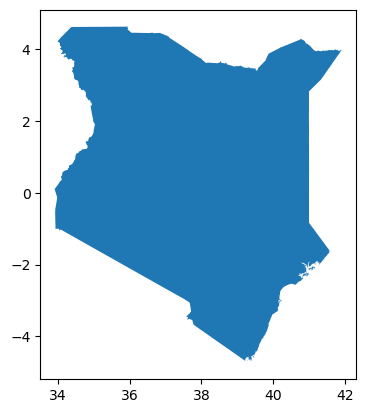

In [7]:
kenya_data.plot()


In [8]:
# Initialize lists to store latitudes and longitudes
latitudes = []
longitudes = []

# Loop through each geometry in the geometry column
for geometry in kenya_data.geometry:
    # Check if the geometry is a MultiPolygon
    if geometry.geom_type == 'MultiPolygon':
        for polygon in geometry.geoms:  # Loop through each polygon using .geoms
            for coord in polygon.exterior.coords:  # Access exterior coordinates
                longitudes.append(coord[0])  # Longitude (x)
                latitudes.append(coord[1])   # Latitude (y)
    # For single Polygons (if any)
    elif geometry.geom_type == 'Polygon':
        for coord in geometry.exterior.coords:
            longitudes.append(coord[0])
            latitudes.append(coord[1])

# Now `latitudes` and `longitudes` hold all the extracted values
print("Latitudes:", latitudes)
print("Longitudes:", longitudes)


Latitudes: [4.218628000431977, 4.273611000797075, 4.323873999335831, 4.372151999865082, 4.423592000520557, 4.472126999411728, 4.5180289991890845, 4.563137000122538, 4.617066618729609, 4.61752541866332, 4.617962223877555, 4.618471922741094, 4.618929588629726, 4.619434057935564, 4.619928096904232, 4.620515802062698, 4.6210722458876035, 4.621555913874488, 4.622013489830806, 4.622517959136587, 4.6229807664492455, 4.623469753026711, 4.623937760219519, 4.624358963095858, 4.624738593011784, 4.6250812598922835, 4.625080999988143, 4.625080999988143, 4.627975000346112, 4.631039000449675, 4.622656999271214, 4.586936000446201, 4.580059999919229, 4.5675979998979415, 4.551268000467928, 4.546433000263107, 4.544552999901327, 4.522529000493307, 4.4885799997475715, 4.456887000514939, 4.456780000077117, 4.455598000427642, 4.454845999923123, 4.4535569998358255, 4.45914300022946, 4.45312699979138, 4.452859000023011, 4.452476512960914, 4.451825438873129, 4.45139548379467, 4.4503390214088085, 4.4497739368978

In [9]:
kenya_data.columns

Index(['ISO_A3', 'ISO_A2', 'WB_A3', 'HASC_0', 'GAUL_0', 'WB_REGION',
       'WB_STATUS', 'SOVEREIGN', 'NAM_0', 'DATA_SRC', 'geometry'],
      dtype='object')

In [10]:
for _, row in kenya_data.iterrows():
    print(row)  # Check if wind density is nested in `properties` or another structure
    break  # Print only the first record for inspection


ISO_A3                                                     KEN
ISO_A2                                                      KE
WB_A3                                                      KEN
HASC_0                                                      KE
GAUL_0                                                     133
WB_REGION                                                  AFR
WB_STATUS                                         Member State
SOVEREIGN                                                  KEN
NAM_0                                                    Kenya
DATA_SRC                                         UN OCHA ROSEA
geometry     MULTIPOLYGON (((33.99206100050492 4.2186280004...
Name: 0, dtype: object


In [11]:
!pip install rasterio


In [12]:
import rasterio

# Open the .tif file
with rasterio.open(r'C:\Users\pc\Downloads\Energy_Access_&_Electrification_Planning_in_Africa\renewable_potential\renewable_data\wind_speed\kenya_wind-speed_100m.tif') as src:
    windspeed_array = src.read(1)  # Read the first band (assuming windspeed is in band 1)
    windspeed_transform = src.transform  # Get the affine transform

In [13]:
!pip install rasterstats


In [14]:
from rasterstats import zonal_stats

# Calculate mean wind speed for each polygon in `kenya_data`
stats = zonal_stats(kenya_data, 
                    r'C:\Users\pc\Downloads\Energy_Access_&_Electrification_Planning_in_Africa\renewable_potential\renewable_data\wind_speed\kenya_wind-speed_100m.tif',
                    stats="mean")

# Extract the mean wind speed values and add to the GeoDataFrame
kenya_data['mean_wind_speed'] = [stat['mean'] for stat in stats]


In [15]:
kenya_data

,ISO_A3,ISO_A2,WB_A3,HASC_0,GAUL_0,WB_REGION,WB_STATUS,SOVEREIGN,NAM_0,DATA_SRC,geometry,mean_wind_speed
0,KEN,KE,KEN,KE,133,AFR,Member State,KEN,Kenya,UN OCHA ROSEA,"MULTIPOLYGON (((33.99206 4.21863, 34.04107 4.2...",5.655644


In [15]:
# Initialize a list to store (longitude, latitude) tuples
points = []

# Loop through each geometry in the geometry column
for geometry in kenya_data.geometry:
    # Check if the geometry is a MultiPolygon
    if geometry.geom_type == 'MultiPolygon':
        for polygon in geometry.geoms:  # Loop through each polygon using .geoms
            for coord in polygon.exterior.coords:  # Access exterior coordinates
                points.append((coord[0], coord[1]))  # Append as (longitude, latitude) tuple
    # For single Polygons (if any)
    elif geometry.geom_type == 'Polygon':
        for coord in geometry.exterior.coords:
            points.append((coord[0], coord[1]))  # Append as (longitude, latitude) tuple

# Now `points` holds all the extracted values as tuples
print("Points:", points)


Points: [(33.99206100050492, 4.218628000431977), (34.04107199976306, 4.273611000797075), (34.084905000355604, 4.323873999335831), (34.13300199973264, 4.372151999865082), (34.1842490004812, 4.423592000520557), (34.23260400006467, 4.472126999411728), (34.27833400000418, 4.5180289991890845), (34.32327300033887, 4.563137000122538), (34.377001619928876, 4.617066618729609), (34.457390160527495, 4.61752541866332), (34.53392474553061, 4.617962223877555), (34.62323156338596, 4.618471922741094), (34.70342130075261, 4.618929588629726), (34.79181172922796, 4.619434057935564), (34.87837458152177, 4.619928096904232), (34.98134921759248, 4.620515802062698), (35.0788463258973, 4.6210722458876035), (35.16359200266885, 4.621555913874488), (35.24376613859653, 4.622013489830806), (35.33215656797131, 4.622517959136587), (35.41324709237949, 4.6229807664492455), (35.498924759070405, 4.623469753026711), (35.58092647207906, 4.623937760219519), (35.654727493079406, 4.624358963095858), (35.721244211451335, 4.624

In [17]:
import rasterio
import pandas as pd
from rasterio.transform import rowcol
import geopandas as gpd
import numpy as np  # Import NumPy to handle NaNs

# Load the Kenya GeoDataFrame
kenya_data = gpd.read_file(r'C:\Users\pc\Downloads\Energy_Access_&_Electrification_Planning_in_Africa\renewable_potential\renewable_data\africa_geojson\kenya.geojson')

# Open the wind speed .tif file
with rasterio.open(r'C:\Users\pc\Downloads\Energy_Access_&_Electrification_Planning_in_Africa\renewable_potential\renewable_data\wind_speed\kenya_wind-speed_100m.tif') as wind_src:
    windspeed_array = wind_src.read(1)  # Read the first band
    wind_transform = wind_src.transform  # Get the affine transform for wind speed

# Open the solar potential .tif file
with rasterio.open(r'C:\Users\pc\Downloads\Energy_Access_&_Electrification_Planning_in_Africa\renewable_potential\renewable_data\pv_potential\Kenya_PVOUT_poster-map_1000x1000mm-300dpi_v20191017.tif') as solar_src:
    solar_array = solar_src.read(1)  # Read the first band
    solar_transform = solar_src.transform  # Get the affine transform for solar potential

# Initialize a list to store results
results = []

# Loop through each polygon in kenya_data
for index, row in kenya_data.iterrows():
    country_name = row['NAM_0']  # Get the country name
    geometry = row['geometry']

    # Extract exterior coordinates from the polygon
    if geometry.geom_type == 'MultiPolygon':
        polygons = geometry.geoms
    elif geometry.geom_type == 'Polygon':
        polygons = [geometry]

    # Loop through each polygon
    for polygon in polygons:
        for coord in polygon.exterior.coords:
            lon, lat = coord  # Unpack coordinates
            
            # Convert latitude and longitude to row, column indices for wind speed
            wind_row_idx, wind_col_idx = rowcol(wind_transform, lon, lat)

            # Ensure row and column indices are integers
            wind_row_idx = int(wind_row_idx)
            wind_col_idx = int(wind_col_idx)

            # Check if wind speed indices are within bounds
            if 0 <= wind_row_idx < windspeed_array.shape[0] and 0 <= wind_col_idx < windspeed_array.shape[1]:
                windspeed = windspeed_array[wind_row_idx, wind_col_idx]  # Extract wind speed value
            else:
                windspeed = np.nan  # Assign NaN if out of bounds

            # Convert latitude and longitude to row, column indices for solar potential
            solar_row_idx, solar_col_idx = rowcol(solar_transform, lon, lat)

            # Ensure row and column indices are integers
            solar_row_idx = int(solar_row_idx)
            solar_col_idx = int(solar_col_idx)

            # Check if solar potential indices are within bounds
            if 0 <= solar_row_idx < solar_array.shape[0] and 0 <= solar_col_idx < solar_array.shape[1]:
                solar_potential = solar_array[solar_row_idx, solar_col_idx]  # Extract solar potential value
            else:
                solar_potential = np.nan  # Assign NaN if out of bounds

            # Append the data to results, including NaN for missing values
            results.append({
                'Country': country_name, 
                'Latitude': lat, 
                'Longitude': lon, 
                'Windspeed': windspeed,
                'Solar Potential': solar_potential  # Include solar potential if needed
            })

# Convert results to DataFrame
Kenya_renewable_df = pd.DataFrame(results)

# Save to CSV
Kenya_renewable_df.to_csv('kenya_windspeed_data.csv', index=False)

print("CSV file created successfully.")


c:\Users\pc\anaconda3\Lib\site-packages\rasterio\__init__.py:368: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


CSV file created successfully.


In [18]:
Kenya_renewable_df

,Country,Latitude,Longitude,Windspeed,Solar Potential
0,Kenya,4.218628,33.992061,NaN,255.0
1,Kenya,4.273611,34.041072,NaN,255.0
2,Kenya,4.323874,34.084905,NaN,255.0
3,Kenya,4.372152,34.133002,NaN,255.0
4,Kenya,4.423592,34.184249,NaN,255.0
...,...,...,...,...,...
8877,Kenya,-2.475034,40.776731,7.070463,NaN
8878,Kenya,-2.476430,40.774825,7.073011,NaN
8879,Kenya,-2.475080,40.774534,7.073011,NaN
8880,Kenya,-2.475294,40.776171,7.073011,NaN


In [16]:
tanzania_data = gpd.read_file(r'C:\Users\pc\Downloads\Energy_Access_&_Electrification_Planning_in_Africa\renewable_potential\renewable_data\africa_geojson\tanzania.geojson')
tanzania_data

,ISO_A3,ISO_A2,WB_A3,HASC_0,GAUL_0,WB_REGION,WB_STATUS,SOVEREIGN,NAM_0,DATA_SRC,geometry
0,TZA,TZ,TZA,TZ,257,AFR,Member State,TZA,Tanzania,GAUL,"MULTIPOLYGON (((39.20052 -4.67106, 39.19968 -4..."


In [18]:
import pandas as pd
est_afr_df = pd.concat([kenya_data, tanzania_data], ignore_index = True)
est_afr_df


,ISO_A3,ISO_A2,WB_A3,HASC_0,GAUL_0,WB_REGION,WB_STATUS,SOVEREIGN,NAM_0,DATA_SRC,geometry,mean_wind_speed
0,KEN,KE,KEN,KE,133,AFR,Member State,KEN,Kenya,UN OCHA ROSEA,"MULTIPOLYGON (((33.99206 4.21863, 34.04107 4.2...",5.655644
1,TZA,TZ,TZA,TZ,257,AFR,Member State,TZA,Tanzania,GAUL,"MULTIPOLYGON (((39.20052 -4.67106, 39.19968 -4...",NaN


<Axes: >

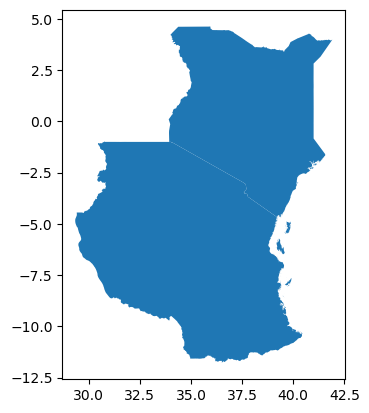

In [21]:
est_afr_df.plot()

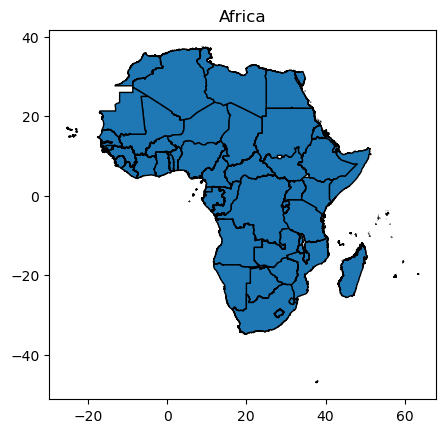

In [19]:
import os
import matplotlib.pyplot as plt

# Folder path
folder_path = r'C:\Users\pc\Downloads\Energy_Access_&_Electrification_Planning_in_Africa\renewable_potential\renewable_data\africa_geojson'

# List to hold individual country GeoDataFrames
geo_dfs = []

# Loop through each file in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith('.geojson'):  # Ensure it's a geojson file
        file_path = os.path.join(folder_path, file_name)
        country_data = gpd.read_file(file_path)
        geo_dfs.append(country_data)

# Concatenate all GeoDataFrames into a single DataFrame
africa_df = gpd.GeoDataFrame(pd.concat(geo_dfs, ignore_index=True))

# Plot the combined data
africa_df.plot(edgecolor='black')
plt.title("Africa")
plt.show()


In [23]:
print(africa_df.shape)
print(africa_df.info())
africa_df.head()

(54, 11)
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   ISO_A3     54 non-null     object  
 1   ISO_A2     54 non-null     object  
 2   WB_A3      54 non-null     object  
 3   HASC_0     54 non-null     object  
 4   GAUL_0     54 non-null     int32   
 5   WB_REGION  54 non-null     object  
 6   WB_STATUS  54 non-null     object  
 7   SOVEREIGN  54 non-null     object  
 8   NAM_0      54 non-null     object  
 9   DATA_SRC   54 non-null     object  
 10  geometry   54 non-null     geometry
dtypes: geometry(1), int32(1), object(9)
memory usage: 4.6+ KB
None


,ISO_A3,ISO_A2,WB_A3,HASC_0,GAUL_0,WB_REGION,WB_STATUS,SOVEREIGN,NAM_0,DATA_SRC,geometry
0,DZA,DZ,DZA,DZ,4,MENA,Member State,DZA,Algeria,GAUL,"MULTIPOLYGON (((-1.48089 35.32603, -1.48045 35..."
1,AGO,AO,AGO,AO,8,AFR,Member State,AGO,Angola,GAUL,"MULTIPOLYGON (((13.09928 -5.88708, 13.10134 -5..."
2,BEN,BJ,BEN,BJ,29,AFR,Member State,BEN,Benin,GAUL,"POLYGON ((2.40406 11.90032, 2.40555 11.89921, ..."
3,BWA,BW,BWA,BW,35,AFR,Member State,BWA,Botswana,GAUL,"POLYGON ((29.3753 -22.19547, 29.37416 -22.1964..."
4,BFA,BF,BFA,BF,42,AFR,Member State,BFA,Burkina Faso,GAUL,"POLYGON ((0.244 14.913, 0.21936 14.88532, 0.17..."


In [24]:
# Convert the original DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(africa_df)

# Create an empty list to hold the new data
data = []

# Iterate through each row in the GeoDataFrame
for index, row in gdf.iterrows():
    # Check if the geometry is a Polygon or Multipolygon
    if row.geometry.geom_type == 'Polygon':
        coords = [row.geometry.exterior.coords]  # Get exterior coordinates
    elif row.geometry.geom_type == 'MultiPolygon':
        coords = [list(p.exterior.coords) for p in row.geometry.geoms]  # Use .geoms to access individual polygons
    else:
        continue  # Skip geometries that are not polygons or multipolygons

    # Flatten the list of coordinates and create new entries
    for coord_set in coords:
        for coord in coord_set:
            data.append({
                'Country': row.NAM_0,
                'Latitude': coord[1],  # Latitude is the second item
                'Longitude': coord[0]  # Longitude is the first item
            })

# Create a new DataFrame from the list of data
africa_df = pd.DataFrame(data)

# Display the new DataFrame
africa_df


,Country,Latitude,Longitude
0,Algeria,35.326030,-1.480890
1,Algeria,35.325061,-1.480446
2,Algeria,35.324230,-1.477978
3,Algeria,35.322418,-1.478756
4,Algeria,35.320978,-1.476937
...,...,...,...
582452,Zimbabwe,-22.381481,31.376175
582453,Zimbabwe,-22.394008,31.355923
582454,Zimbabwe,-22.410507,31.328482
582455,Zimbabwe,-22.418742,31.315004


In [20]:
print(africa_df.isna().sum())
print(africa_df.shape)
africa_df.info()

ISO_A3       0
ISO_A2       0
WB_A3        0
HASC_0       0
GAUL_0       0
WB_REGION    0
WB_STATUS    0
SOVEREIGN    0
NAM_0        0
DATA_SRC     0
geometry     0
dtype: int64
(54, 11)
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   ISO_A3     54 non-null     object  
 1   ISO_A2     54 non-null     object  
 2   WB_A3      54 non-null     object  
 3   HASC_0     54 non-null     object  
 4   GAUL_0     54 non-null     int32   
 5   WB_REGION  54 non-null     object  
 6   WB_STATUS  54 non-null     object  
 7   SOVEREIGN  54 non-null     object  
 8   NAM_0      54 non-null     object  
 9   DATA_SRC   54 non-null     object  
 10  geometry   54 non-null     geometry
dtypes: geometry(1), int32(1), object(9)
memory usage: 4.6+ KB


In [39]:
import numpy as np

kenya_wind_speed = r'C:\Users\pc\Downloads\Energy_Access_&_Electrification_Planning_in_Africa\renewable_potential\renewable_data\wind_speed\kenya_wind-speed_100m.tif'

# Read the TIFF file
with rasterio.open(kenya_wind_speed) as src:
    kenya_wind_data = src.read(1)  # Read the first band (assuming wind data is in the first band)
    kenya_wind_meta_data = src.profile  # Get metadata about the file

kenya_wind_meta_data

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': nan, 'width': 4149, 'height': 3806, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.002500000000000124, 0.0, 33.906572682195275,
       0.0, -0.002500000000000124, 4.623268747733392), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'deflate', 'interleave': 'band'}

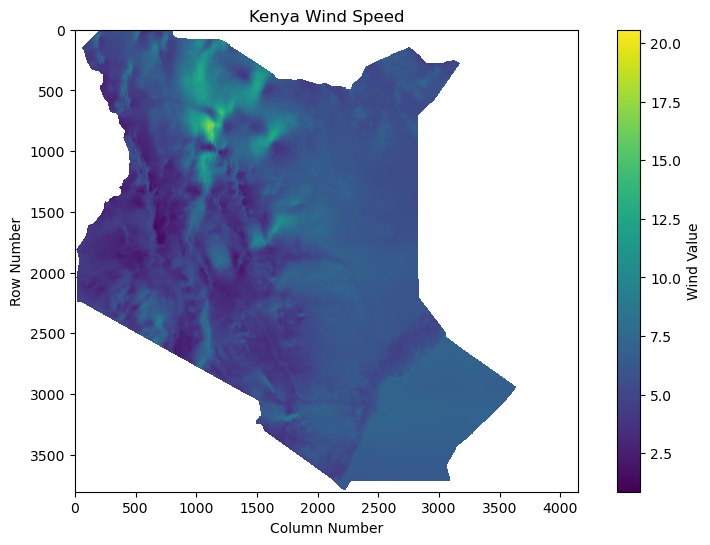

In [40]:
plt.figure(figsize=(10, 6))
plt.imshow(kenya_wind_data, cmap='viridis')
plt.colorbar(label='Wind Value')
plt.title('Kenya Wind Speed')
plt.xlabel('Column Number')
plt.ylabel('Row Number')
plt.show()

In [41]:
kenya_pv_potential = r'C:\Users\pc\Downloads\Energy_Access_&_Electrification_Planning_in_Africa\renewable_potential\renewable_data\pv_potential\Kenya_PVOUT_poster-map_1000x1000mm-300dpi_v20191017.tif'

# Read the TIFF file
with rasterio.open(kenya_pv_potential) as src:
    kenya_pv_data = src.read(1)  
    kenya_pv_meta_data = src.profile

kenya_pv_meta_data

{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 11811, 'height': 11811, 'count': 4, 'crs': None, 'transform': Affine(1.0, 0.0, 0.0,
       0.0, 1.0, 0.0), 'blockxsize': 11811, 'blockysize': 1, 'tiled': False, 'compress': 'lzw', 'interleave': 'pixel'}

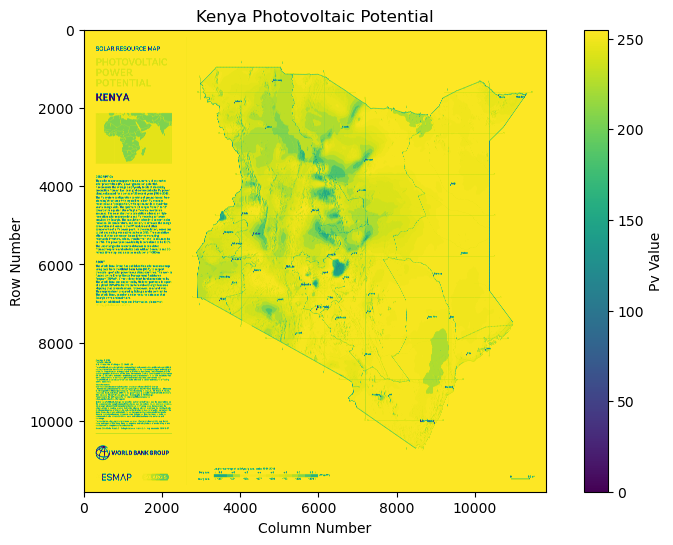

In [42]:
plt.figure(figsize=(10, 6))
plt.imshow(kenya_pv_data, cmap='viridis')
plt.colorbar(label='Pv Value')
plt.title('Kenya Photovoltaic Potential')
plt.xlabel('Column Number')
plt.ylabel('Row Number')
plt.show()

In [43]:
# Load the TIFF file
Kenya_wind_speed = r'C:\Users\pc\Downloads\Energy_Access_&_Electrification_Planning_in_Africa\renewable_potential\renewable_data\wind_speed\kenya_wind-speed_100m.tif'

with rasterio.open(kenya_wind_speed) as src:
    # Read the wind speed data from the first band
    wind_data = src.read(1)
    
    # Get the affine transformation matrix to convert pixel coordinates to geographic coordinates
    transform = src.transform

# Create a list to store latitude, longitude, and wind speed values
data = []

# Loop over each pixel
for row in range(wind_data.shape[0]):
    for col in range(wind_data.shape[1]):
        # Convert row, col to latitude, longitude
        lon, lat = rasterio.transform.xy(transform, row, col)
        wind_speed = wind_data[row, col]
        
        # Append to data list if wind speed is valid (not a nodata value)
        if not np.isnan(wind_speed):
            data.append({'Latitude': lat, 'Longitude': lon, 'Wind Speed': wind_speed})

# Create a DataFrame from the data
kenya_wind_df = pd.DataFrame(data)

# Display the DataFrame
print(kenya_wind_df)


         Latitude  Longitude  Wind Speed
0        4.622019  35.915323    6.276936
1        4.622019  35.917823    6.260634
2        4.622019  35.920323    6.232945
3        4.622019  35.922823    6.241162
4        4.622019  35.925323    6.216225
...           ...        ...         ...
8538058 -4.887981  39.480323    6.142080
8538059 -4.890481  39.472823    6.143734
8538060 -4.890481  39.475323    6.142651
8538061 -4.890481  39.477823    6.141578
8538062 -4.890481  39.480323    6.140533

[8538063 rows x 3 columns]


In [ ]:
wind_folder_path = r'C:\Users\pc\Downloads\Energy_Access_&_Electrification_Planning_in_Africa\renewable_potential\renewable_data\wind_speed'

# List to store data for all countries
all_data = []

# Loop over each file in the folder
for file_name in os.listdir(wind_folder_path):
    if file_name.endswith('.tif'):  # Process only TIFF files
        tiff_file_path = os.path.join(wind_folder_path, file_name)
        
        with rasterio.open(tiff_file_path) as src:
            # Read the wind speed data from the first band
            wind_data = src.read(1)
            
            # Get the affine transformation matrix
            transform = src.transform
            
            # Get country name from the file name (assuming each file is named after the country)
            country_name = os.path.splitext(file_name)[0]
        
            # Loop over each pixel in the TIFF
            for row in range(wind_data.shape[0]):
                for col in range(wind_data.shape[1]):
                    # Convert row, col to latitude, longitude
                    lon, lat = rasterio.transform.xy(transform, row, col)
                    wind_speed = wind_data[row, col]
                    
                    # Append data if wind speed is valid (not NaN)
                    if not np.isnan(wind_speed):
                        all_data.append({
                            'Country': country_name,
                            'Latitude': lat,
                            'Longitude': lon,
                            'Wind Speed': wind_speed
                        })

# Create a DataFrame from all the data
africa_wind_df = pd.DataFrame(all_data)

# Display the combined DataFrame
print(africa_wind_df)


In [ ]:
pv_folder_path = r'C:\Users\pc\Downloads\Energy_Access_&_Electrification_Planning_in_Africa\renewable_potential\renewable_data\pv_potential'

# List to store data for all countries
all_data = []

# Loop over each file in the folder
for file_name in os.listdir(pv_folder_path):
    if file_name.endswith('.tif'):  # Process only TIFF files
        tiff_file_path = os.path.join(pv_folder_path, file_name)
        
        with rasterio.open(tiff_file_path) as src:
            # Read the solar speed data from the first band
            wind_data = src.read(1)
            
            # Get the affine transformation matrix
            transform = src.transform
            
            # Get country name from the file name (assuming each file is named after the country)
            country_name = os.path.splitext(file_name)[0]
        
            # Loop over each pixel in the TIFF
            for row in range(wind_data.shape[0]):
                for col in range(wind_data.shape[1]):
                    # Convert row, col to latitude, longitude
                    lon, lat = rasterio.transform.xy(transform, row, col)
                    wind_speed = wind_data[row, col]
                    
                    # Append data if wind speed is valid (not NaN)
                    if not np.isnan(wind_speed):
                        all_data.append({
                            'Country': country_name,
                            'Latitude': lat,
                            'Longitude': lon,
                            'Wind Speed': wind_speed
                        })

# Create a DataFrame from all the data
africa_pv_df = pd.DataFrame(all_data)

# Display the combined DataFrame
print(africa_pv_df)
